<a href="https://colab.research.google.com/github/nxf-emma/APS360-Artificial-Intelligence-Fundamentals/blob/main/Emma_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#mount googledrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import torch
import numpy as np
import os
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [27]:
def get_accuracy(model, dataloader):
    

    correct = 0
    total = 0
    for imgs, labels in dataloader:
        
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [6]:
#Convolutional Neural Network Architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 

        self.conv1 = nn.Conv2d(256, 300, 3, padding = 3) #in_channels, out_chanels, kernel_size 
        self.conv2 = nn.Conv2d(300, 350, 3,padding = 3) #in_channels, out_chanels, kernel_size
        self.conv3 = nn.Conv2d(350, 400, 1,padding = 1)
        self.conv4 = nn.Conv2d(400, 450, 1, padding = 1)
        
        self.fc1 = nn.Linear(450*2*2, 70) #chanels*dimension
        self.fc3 = nn.Linear(70, 32)
        self.fc2 = nn.Linear(32, 7) #last output channel always = 7
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #5
        # 113
        x = self.pool(F.relu(self.dropout(self.conv2(x)))) #4
        # 55
        x = self.pool(F.relu(self.conv3(x))) #3
        # 26
        x = self.pool(F.relu(self.dropout(self.conv4(x)))) #2
        # 12


        x = x.view(-1, 450*2*2)
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc3(x)))
        x = self.fc2(x)
        # x = x.squeeze(1)
        return x

In [7]:
def train2(model, train_data, val_data, wd = 5e-4, momentum = 0.9, batch_size=3000, num_epochs=5, lr = 0.01):
    
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum,weight_decay=wd)

    iters, losses, train_acc, val_acc, val_loss = [], [], [], [],[]

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch", epoch)
        n = 0
        for imgs, labels in iter(train_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1

        for imgs, labels in iter(val_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss_val = criterion(out, labels) # compute the total loss
        
        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        val_loss.append(float(loss_val)/batch_size)
        # calculate accuracy at each epoch instead of iteration
        # def get_accuracy(model, data):
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        # compute validation acc every epoch
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print("Epoch: ", epoch, " Train Accuracy: ", train_acc[epoch])
        print("Epoch: ", epoch, " Validation Accuracy: ", val_acc[epoch])

            

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.plot(iters, val_loss, label="val")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [8]:
trainPath = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER_alexnet_big/train'
valPath = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER_alexnet_big/valid'
tData = torchvision.datasets.DatasetFolder(trainPath, loader=torch.load, extensions = ('.tensor'))
vData = torchvision.datasets.DatasetFolder(valPath,loader=torch.load, extensions = ('.tensor'))

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.2513149186666202
Epoch:  0  Validation Accuracy:  0.2449150181108944
Epoch 1
Epoch:  1  Train Accuracy:  0.27914591243164166
Epoch:  1  Validation Accuracy:  0.2825299526330454
Epoch 2
Epoch:  2  Train Accuracy:  0.4484308056706956
Epoch:  2  Validation Accuracy:  0.4371691278907774
Epoch 3
Epoch:  3  Train Accuracy:  0.45870632902574104
Epoch:  3  Validation Accuracy:  0.44246308163833936
Epoch 4
Epoch:  4  Train Accuracy:  0.47072346650876035
Epoch:  4  Validation Accuracy:  0.45082195597659513
Epoch 5
Epoch:  5  Train Accuracy:  0.4892890731129611
Epoch:  5  Validation Accuracy:  0.47339091668988575
Epoch 6
Epoch:  6  Train Accuracy:  0.49636002647253474
Epoch:  6  Validation Accuracy:  0.4672610755084982
Epoch 7
Epoch:  7  Train Accuracy:  0.5399003796718799
Epoch:  7  Validation Accuracy:  0.5037614934522151
Epoch 8
Epoch:  8  Train Accuracy:  0.5006095649447908
Epoch:  8  Validation Accuracy:  0.4706046

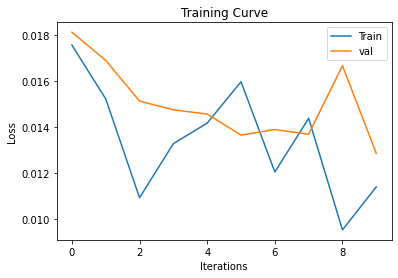

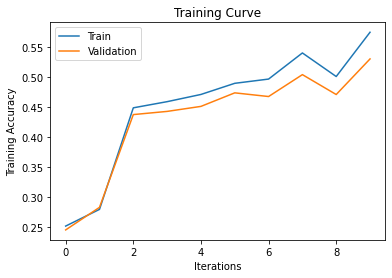

Final Training Accuracy: 0.5744191716883207
Final Validation Accuracy: 0.5299526330454165


In [ ]:
use_cuda = True
model1 = CNN()

if use_cuda and torch.cuda.is_available():
  model1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.01, num_epochs=10)

Epoch 0
Epoch:  0  Train Accuracy:  0.5857744958027099
Epoch:  0  Validation Accuracy:  0.5257731958762887
Epoch 1
Epoch:  1  Train Accuracy:  0.5618447176843498
Epoch:  1  Validation Accuracy:  0.4864864864864865
Epoch 2
Epoch:  2  Train Accuracy:  0.5834755651537845
Epoch:  2  Validation Accuracy:  0.5123989969350794
Epoch 3
Epoch:  3  Train Accuracy:  0.602459159148699
Epoch:  3  Validation Accuracy:  0.5288381164669824
Epoch 4
Epoch:  4  Train Accuracy:  0.6464871643038769
Epoch:  4  Validation Accuracy:  0.5385901365282808


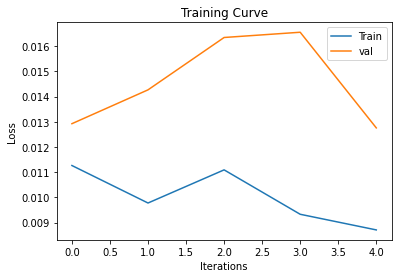

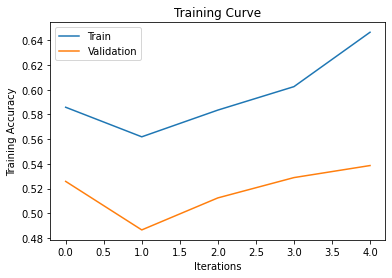

Final Training Accuracy: 0.6464871643038769
Final Validation Accuracy: 0.5385901365282808


In [ ]:
train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.01, num_epochs=5)

Epoch 0
Epoch:  0  Train Accuracy:  0.6867881152251907
Epoch:  0  Validation Accuracy:  0.5533574811925327
Epoch 1
Epoch:  1  Train Accuracy:  0.7058413737852242
Epoch:  1  Validation Accuracy:  0.5380328782390638
Epoch 2
Epoch:  2  Train Accuracy:  0.689888188372984
Epoch:  2  Validation Accuracy:  0.5235441627194205
Epoch 3
Epoch:  3  Train Accuracy:  0.7219338883277021
Epoch:  3  Validation Accuracy:  0.5486207857341878
Epoch 4
Epoch:  4  Train Accuracy:  0.7479536033996308
Epoch:  4  Validation Accuracy:  0.5547506269155754


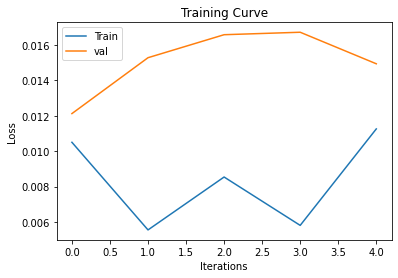

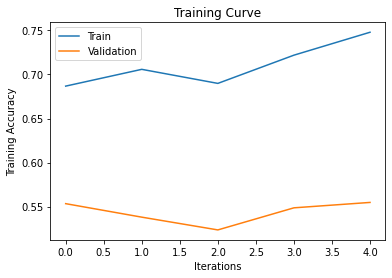

Final Training Accuracy: 0.7479536033996308
Final Validation Accuracy: 0.5547506269155754


In [ ]:
train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.005, num_epochs=5)

Epoch 0
Epoch:  0  Train Accuracy:  0.7063638580236163
Epoch:  0  Validation Accuracy:  0.5480635274449708
Epoch 1
Epoch:  1  Train Accuracy:  0.757114493712773
Epoch:  1  Validation Accuracy:  0.5522429646140986
Epoch 2
Epoch:  2  Train Accuracy:  0.7690967989132328
Epoch:  2  Validation Accuracy:  0.5525215937587071
Epoch 3
Epoch:  3  Train Accuracy:  0.7787453411822076
Epoch:  3  Validation Accuracy:  0.5530788520479242
Epoch 4
Epoch:  4  Train Accuracy:  0.7675990107631753
Epoch:  4  Validation Accuracy:  0.5291167456115909


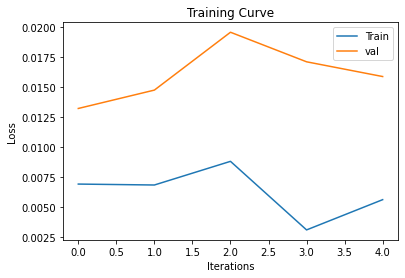

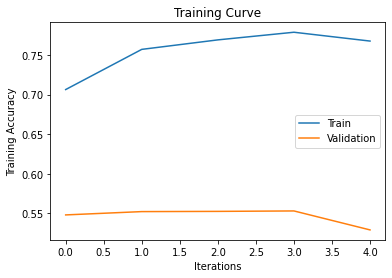

Final Training Accuracy: 0.7675990107631753
Final Validation Accuracy: 0.5291167456115909


In [ ]:
train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.005, num_epochs=5, wd=0.001)

Epoch 0
Epoch:  0  Train Accuracy:  0.7840050158486885
Epoch:  0  Validation Accuracy:  0.5416550571189747
Epoch 1
Epoch:  1  Train Accuracy:  0.7847016614998781
Epoch:  1  Validation Accuracy:  0.5617163555307885
Epoch 2
Epoch:  2  Train Accuracy:  0.751193005677662
Epoch:  2  Validation Accuracy:  0.5330175536361104
Epoch 3
Epoch:  3  Train Accuracy:  0.7737294924936431
Epoch:  3  Validation Accuracy:  0.5567010309278351
Epoch 4
Epoch:  4  Train Accuracy:  0.7216203977846668
Epoch:  4  Validation Accuracy:  0.5210365004179437


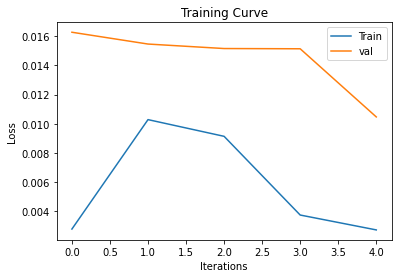

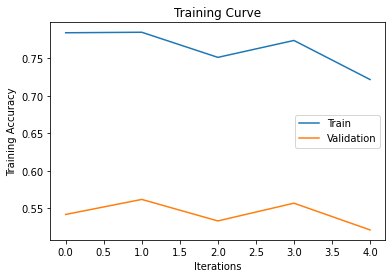

Final Training Accuracy: 0.7216203977846668
Final Validation Accuracy: 0.5210365004179437


In [ ]:
train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.005, num_epochs=5, wd=0.01)

Epoch 0
Epoch:  0  Train Accuracy:  0.8428019088090842
Epoch:  0  Validation Accuracy:  0.5700752298690444
Epoch 1
Epoch:  1  Train Accuracy:  0.8648507436692326
Epoch:  1  Validation Accuracy:  0.5728615213151296
Epoch 2
Epoch:  2  Train Accuracy:  0.8795499669093315
Epoch:  2  Validation Accuracy:  0.5664530509891335
Epoch 3
Epoch:  3  Train Accuracy:  0.8866905848340242
Epoch:  3  Validation Accuracy:  0.5806631373641683
Epoch 4
Epoch:  4  Train Accuracy:  0.8889198509178307
Epoch:  4  Validation Accuracy:  0.5606018389523544


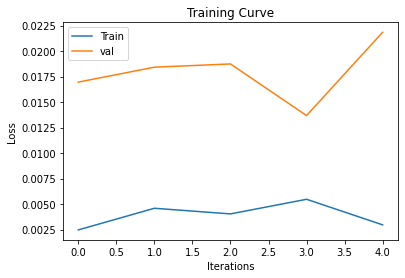

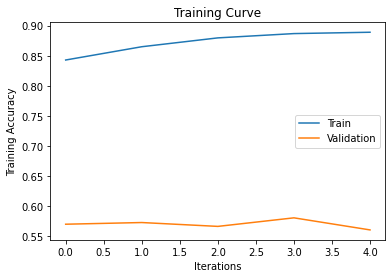

Final Training Accuracy: 0.8889198509178307
Final Validation Accuracy: 0.5606018389523544


In [ ]:
train2(model1, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.001, num_epochs=5, wd=0.005)

Epoch 0
Epoch:  0  Train Accuracy:  0.912361977080358
Epoch:  0  Validation Accuracy:  0.5684034550013931
Epoch 1
Epoch:  1  Train Accuracy:  0.9145912431641645
Epoch:  1  Validation Accuracy:  0.5812203956533853
Epoch 2
Epoch:  2  Train Accuracy:  0.9170643352258874
Epoch:  2  Validation Accuracy:  0.5795486207857342
Epoch 3
Epoch:  3  Train Accuracy:  0.9180396391375527
Epoch:  3  Validation Accuracy:  0.5778768459180831
Epoch 4
Epoch:  4  Train Accuracy:  0.9203734020690376
Epoch:  4  Validation Accuracy:  0.5692393424352187


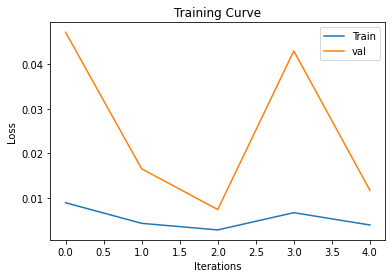

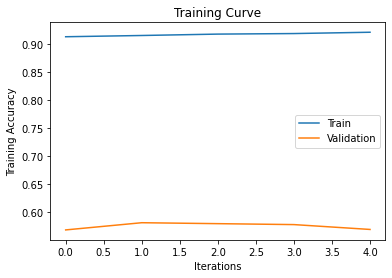

Final Training Accuracy: 0.9203734020690376
Final Validation Accuracy: 0.5692393424352187


In [ ]:
train2(model1, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.0001, num_epochs=5, wd=0.01)

In [ ]:
val_loader = torch.utils.data.DataLoader(vData, batch_size=64, 
                                          num_workers=1, shuffle=True)

use_cuda = True
# model1 = CNN()

if use_cuda and torch.cuda.is_available():
  model1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

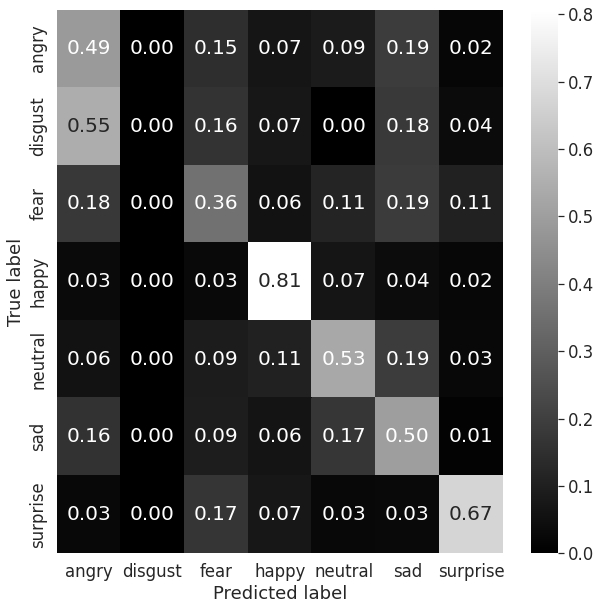

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# constant for classes
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
y_pred = []
y_true = []
# iterate over test data
for inputs, labels in val_loader:
        inputs, labels = inputs.cuda(), labels.cuda() # add this line
        
        output = model1(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        #print(output)
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
        #print(labels)
# Compute confusion matrix:
cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix:
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                 cmap='gray', yticklabels=emotion_labels,
                 xticklabels=emotion_labels, vmin=0,
                 vmax=np.max(cm_normalised), fmt=".2f",
                 annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

# Alexnet with less happy and 4260 
same model as before

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.29014604556094026
Epoch:  0  Validation Accuracy:  0.22429646140986348
Epoch 1
Epoch:  1  Train Accuracy:  0.351399465928197
Epoch:  1  Validation Accuracy:  0.26219002507662303
Epoch 2
Epoch:  2  Train Accuracy:  0.3385092143869713
Epoch:  2  Validation Accuracy:  0.26804123711340205
Epoch 3
Epoch:  3  Train Accuracy:  0.40774074440378466
Epoch:  3  Validation Accuracy:  0.3466146558930064
Epoch 4
Epoch:  4  Train Accuracy:  0.4368509544060924
Epoch:  4  Validation Accuracy:  0.3605461131234327
Epoch 5
Epoch:  5  Train Accuracy:  0.5128737678436027
Epoch:  5  Validation Accuracy:  0.4446921147952076
Epoch 6
Epoch:  6  Train Accuracy:  0.5432037714700162
Epoch:  6  Validation Accuracy:  0.4786848704374478
Epoch 7
Epoch:  7  Train Accuracy:  0.5683578940427917
Epoch:  7  Validation Accuracy:  0.5076623014767344
Epoch 8
Epoch:  8  Train Accuracy:  0.5740942208156133
Epoch:  8  Validation Accuracy:  0.4998606854

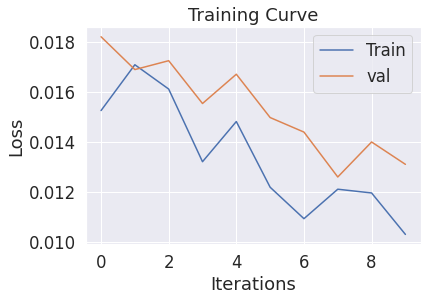

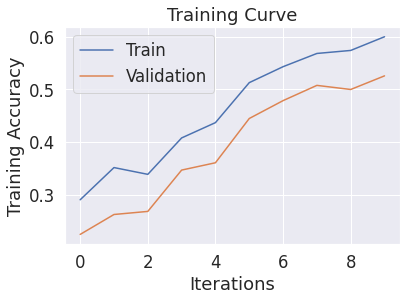

Final Training Accuracy: 0.6001384630600336
Final Validation Accuracy: 0.5257731958762887


In [ ]:
use_cuda = True
model2 = CNN()

if use_cuda and torch.cuda.is_available():
  model2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(model2, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.01, num_epochs=10)

Epoch 0
Epoch:  0  Train Accuracy:  0.6377212936405895
Epoch:  0  Validation Accuracy:  0.5419336862635832
Epoch 1
Epoch:  1  Train Accuracy:  0.6516665018296904
Epoch:  1  Validation Accuracy:  0.5422123154081917
Epoch 2
Epoch:  2  Train Accuracy:  0.6460950120330993
Epoch:  2  Validation Accuracy:  0.5121203677904709
Epoch 3
Epoch:  3  Train Accuracy:  0.674545874130485
Epoch:  3  Validation Accuracy:  0.5291167456115909
Epoch 4
Epoch:  4  Train Accuracy:  0.6694359278673392
Epoch:  4  Validation Accuracy:  0.5285594873223739
Epoch 5
Epoch:  5  Train Accuracy:  0.6726337652062111
Epoch:  5  Validation Accuracy:  0.5416550571189747
Epoch 6
Epoch:  6  Train Accuracy:  0.7100187914152902
Epoch:  6  Validation Accuracy:  0.530231262190025
Epoch 7
Epoch:  7  Train Accuracy:  0.7158540203738503
Epoch:  7  Validation Accuracy:  0.5438840902758428
Epoch 8
Epoch:  8  Train Accuracy:  0.7272607391290015
Epoch:  8  Validation Accuracy:  0.5447199777096684
Epoch 9
Epoch:  9  Train Accuracy:  0.7

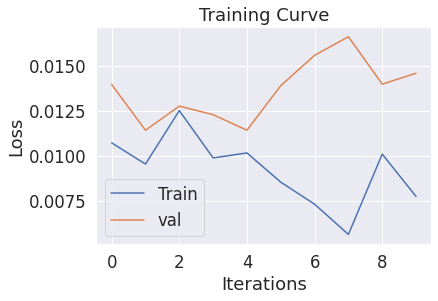

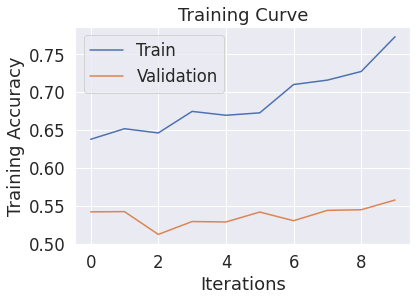

Final Training Accuracy: 0.7731183859163288
Final Validation Accuracy: 0.5575369183616606


In [ ]:
train2(model2, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.005, num_epochs=10)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def matrix(modelfinal):
  # constant for classes
  emotion_labels = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
  y_pred = []
  y_true = []
  # iterate over test data
  for inputs, labels in val_loader:
          inputs, labels = inputs.cuda(), labels.cuda() # add this line
          
          output = modelfinal(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          #print(output)
          y_pred.extend(output) # Save Prediction
          
          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth
          #print(labels)
  # Compute confusion matrix:
  cm = confusion_matrix(y_true, y_pred)
  cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # Plot confusion matrix:
  sns.set(font_scale=1.5) 
  fig, ax = plt.subplots(figsize=(10,10))
  ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                  cmap='Blues', yticklabels=emotion_labels,
                  xticklabels=emotion_labels, vmin=0,
                  vmax=np.max(cm_normalised), fmt=".2f",
                  annot_kws={"size": 20})
  ax.set(xlabel='Predicted label', ylabel='True label')

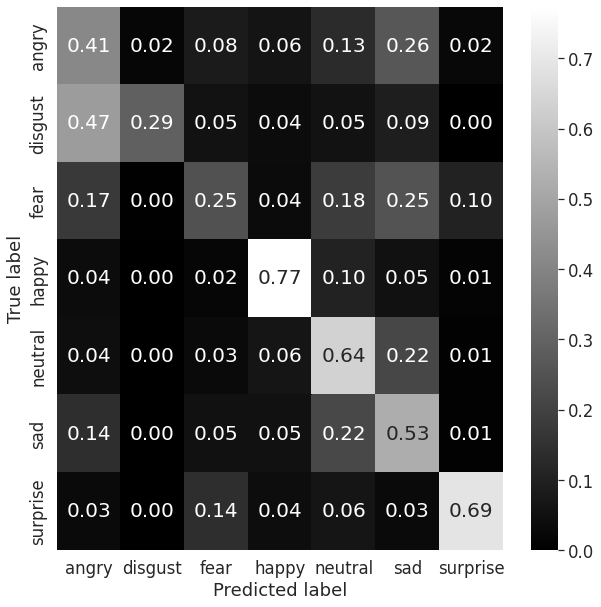

In [ ]:
matrix(model2)

Epoch 0
Epoch:  0  Train Accuracy:  0.8229650875284343
Epoch:  0  Validation Accuracy:  0.5653385344106994
Epoch 1
Epoch:  1  Train Accuracy:  0.8340091649358784
Epoch:  1  Validation Accuracy:  0.572582892170521
Epoch 2
Epoch:  2  Train Accuracy:  0.8538225694787854
Epoch:  2  Validation Accuracy:  0.5745332961827807
Epoch 3
Epoch:  3  Train Accuracy:  0.8577786569083177
Epoch:  3  Validation Accuracy:  0.5684034550013931
Epoch 4
Epoch:  4  Train Accuracy:  0.8668117232057495
Epoch:  4  Validation Accuracy:  0.5697966007244358
Epoch 5
Epoch:  5  Train Accuracy:  0.8788448224705766
Epoch:  5  Validation Accuracy:  0.5711897464474784
Epoch 6
Epoch:  6  Train Accuracy:  0.8900537368542512
Epoch:  6  Validation Accuracy:  0.5647812761214823
Epoch 7
Epoch:  7  Train Accuracy:  0.8880427257442389
Epoch:  7  Validation Accuracy:  0.5622736138200056
Epoch 8
Epoch:  8  Train Accuracy:  0.9049879669007351
Epoch:  8  Validation Accuracy:  0.5762050710504318
Epoch 9
Epoch:  9  Train Accuracy:  0.

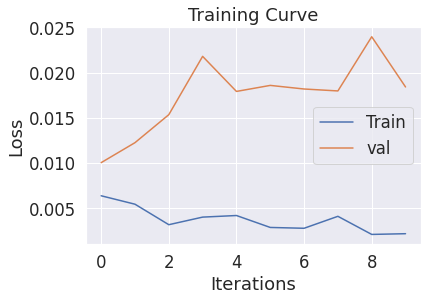

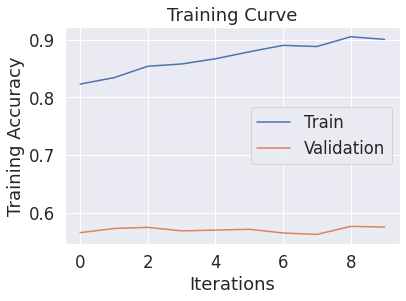

Final Training Accuracy: 0.9003725315662809
Final Validation Accuracy: 0.5750905544719978


In [ ]:
train2(model2, tData, vData, batch_size = 100, momentum = 0.9, lr= 0.001, num_epochs=10, wd=1e-4)

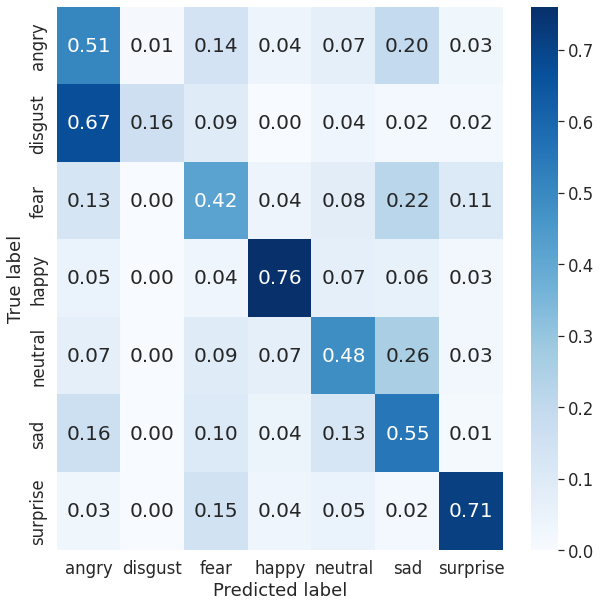

In [ ]:
matrix(model2)

[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

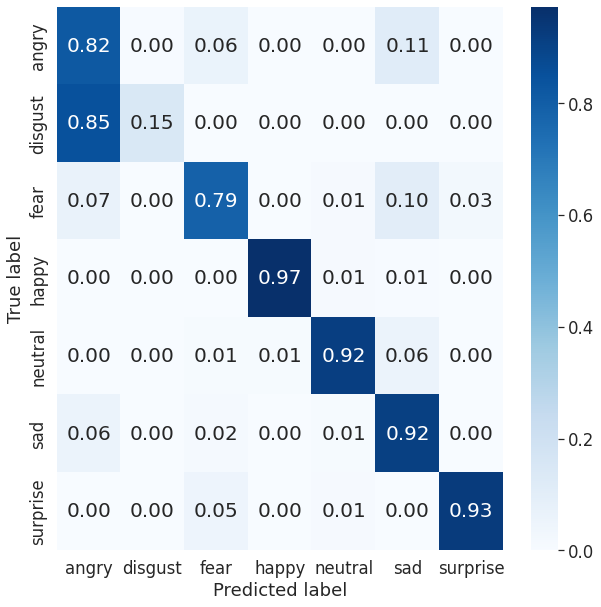

In [ ]:
  train_loader  = torch.utils.data.DataLoader(tData, batch_size=64, 
                                          num_workers=1, shuffle=True)
  emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
  y_pred = []
  y_true = []
  # iterate over test data
  for inputs, labels in train_loader:
          inputs, labels = inputs.cuda(), labels.cuda() # add this line
          
          output = model2(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          #print(output)
          y_pred.extend(output) # Save Prediction
          
          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth
          #print(labels)
  # Compute confusion matrix:
  cm = confusion_matrix(y_true, y_pred)
  cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # Plot confusion matrix:
  sns.set(font_scale=1.5) 
  fig, ax = plt.subplots(figsize=(10,10))
  ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                  cmap='Blues', yticklabels=emotion_labels,
                  xticklabels=emotion_labels, vmin=0,
                  vmax=np.max(cm_normalised), fmt=".2f",
                  annot_kws={"size": 20})
  ax.set(xlabel='Predicted label', ylabel='True label')

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.3082781129462961
Epoch:  0  Validation Accuracy:  0.1905823349122318
Epoch 1
Epoch:  1  Train Accuracy:  0.32515741931230013
Epoch:  1  Validation Accuracy:  0.2075787127333519
Epoch 2
Epoch:  2  Train Accuracy:  0.40279563511686944
Epoch:  2  Validation Accuracy:  0.3337977152410142
Epoch 3
Epoch:  3  Train Accuracy:  0.4208947351069792
Epoch:  3  Validation Accuracy:  0.3764279743661187
Epoch 4
Epoch:  4  Train Accuracy:  0.44667523818943067
Epoch:  4  Validation Accuracy:  0.39370298133184733
Epoch 5
Epoch:  5  Train Accuracy:  0.4498401081330564
Epoch:  5  Validation Accuracy:  0.4034550013931457
Epoch 6
Epoch:  6  Train Accuracy:  0.4403454983021792
Epoch:  6  Validation Accuracy:  0.3900808024519365
Epoch 7
Epoch:  7  Train Accuracy:  0.48429103616523256
Epoch:  7  Validation Accuracy:  0.427974366118696
Epoch 8
Epoch:  8  Train Accuracy:  0.47914812250684075
Epoch:  8  Validation Accuracy:  0.439955419

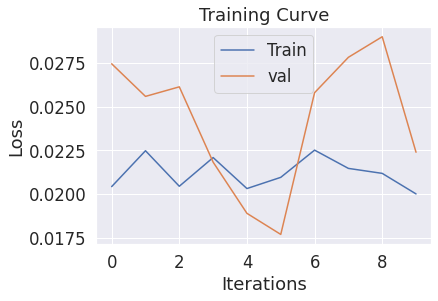

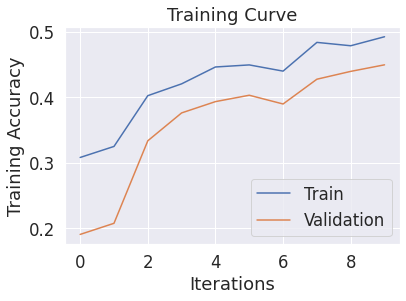

Final Training Accuracy: 0.4929284937197112
Final Validation Accuracy: 0.44998606854276957


In [ ]:
use_cuda = True
model3 = CNN()

if use_cuda and torch.cuda.is_available():
  model3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(model3, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.01, num_epochs=10, wd=0.01)

Epoch 0
Epoch:  0  Train Accuracy:  0.48903834108067123
Epoch:  0  Validation Accuracy:  0.4313179158539983
Epoch 1
Epoch:  1  Train Accuracy:  0.5179837141067484
Epoch:  1  Validation Accuracy:  0.4522151016996378
Epoch 2
Epoch:  2  Train Accuracy:  0.516203474763459
Epoch:  2  Validation Accuracy:  0.4471997770966843
Epoch 3
Epoch:  3  Train Accuracy:  0.5286981175617315
Epoch:  3  Validation Accuracy:  0.45305098913346337
Epoch 4
Epoch:  4  Train Accuracy:  0.5225991494412027
Epoch:  4  Validation Accuracy:  0.4505433268319866
Epoch 5
Epoch:  5  Train Accuracy:  0.49780766821613426
Epoch:  5  Validation Accuracy:  0.4382836444692115
Epoch 6
Epoch:  6  Train Accuracy:  0.5253354432466291
Epoch:  6  Validation Accuracy:  0.4360546113123433
Epoch 7
Epoch:  7  Train Accuracy:  0.5146210397916461
Epoch:  7  Validation Accuracy:  0.43939816104764556
Epoch 8
Epoch:  8  Train Accuracy:  0.5395114232024528
Epoch:  8  Validation Accuracy:  0.4446921147952076
Epoch 9
Epoch:  9  Train Accuracy:

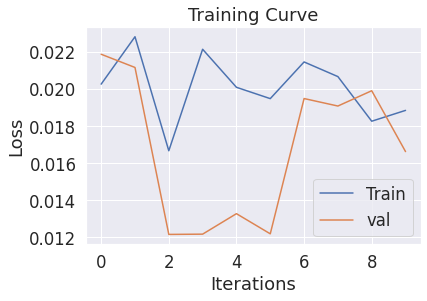

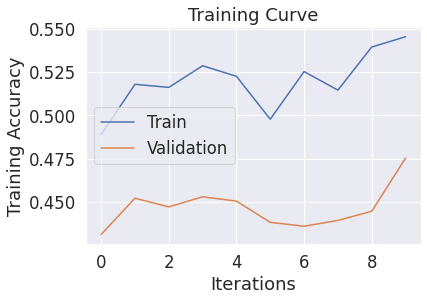

Final Training Accuracy: 0.545445554346751
Final Validation Accuracy: 0.47534132070214546


In [ ]:
train2(model3, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.005, num_epochs=10, wd=0.01)

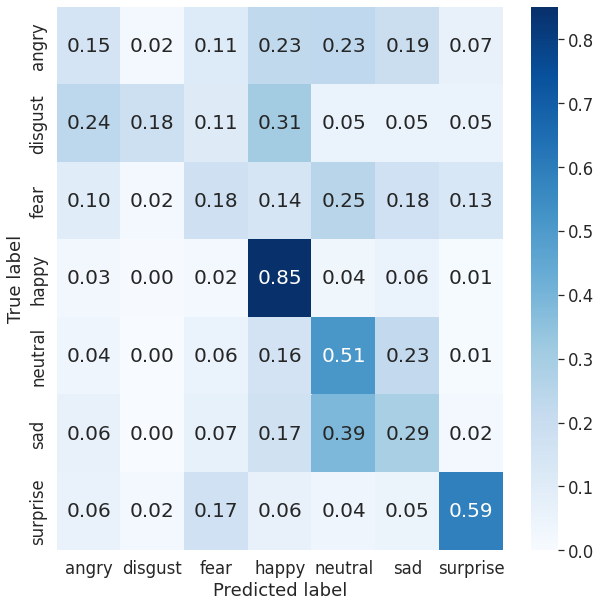

In [ ]:
matrix(model3)

# Without Disgust

In [ ]:
#Convolutional Neural Network Architecture
class CNNwithout(nn.Module):
    def __init__(self):
        super(CNNwithout, self).__init__()

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 

        self.conv1 = nn.Conv2d(256, 300, 3, padding = 3) #in_channels, out_chanels, kernel_size 
        self.conv2 = nn.Conv2d(300, 350, 3,padding = 3) #in_channels, out_chanels, kernel_size
        self.conv3 = nn.Conv2d(350, 400, 1,padding = 1)
        self.conv4 = nn.Conv2d(400, 450, 1, padding = 1)
        
        self.fc1 = nn.Linear(450*2*2, 70) #chanels*dimension
        self.fc3 = nn.Linear(70, 32)
        self.fc2 = nn.Linear(32, 6) #last output channel always = 6
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #5
        # 113
        x = self.pool(F.relu(self.dropout(self.conv2(x)))) #4
        # 55
        x = self.pool(F.relu(self.conv3(x))) #3
        # 26
        x = self.pool(F.relu(self.dropout(self.conv4(x)))) #2
        # 12


        x = x.view(-1, 450*2*2)
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc3(x)))
        x = self.fc2(x)
        # x = x.squeeze(1)
        return x

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.19767575652974342
Epoch:  0  Validation Accuracy:  0.1861912846632711
Epoch 1
Epoch:  1  Train Accuracy:  0.35906876845779157
Epoch:  1  Validation Accuracy:  0.3763440860215054
Epoch 2
Epoch:  2  Train Accuracy:  0.38794921949909866
Epoch:  2  Validation Accuracy:  0.4091680814940577
Epoch 3
Epoch:  3  Train Accuracy:  0.43151919610324857
Epoch:  3  Validation Accuracy:  0.44991511035653653
Epoch 4
Epoch:  4  Train Accuracy:  0.4498906915199632
Epoch:  4  Validation Accuracy:  0.4524617996604414
Epoch 5
Epoch:  5  Train Accuracy:  0.47708357304491233
Epoch:  5  Validation Accuracy:  0.478494623655914
Epoch 6
Epoch:  6  Train Accuracy:  0.52464235032409
Epoch:  6  Validation Accuracy:  0.511601584606678
Epoch 7
Epoch:  7  Train Accuracy:  0.5273654738618494
Epoch:  7  Validation Accuracy:  0.5132993774759479
Epoch 8
Epoch:  8  Train Accuracy:  0.5649522494534576
Epoch:  8  Validation Accuracy:  0.528013582342

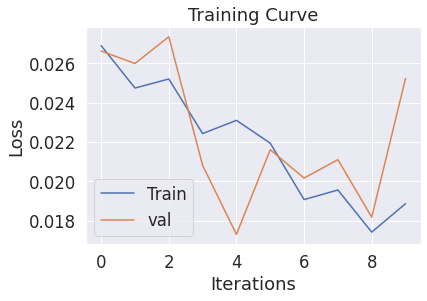

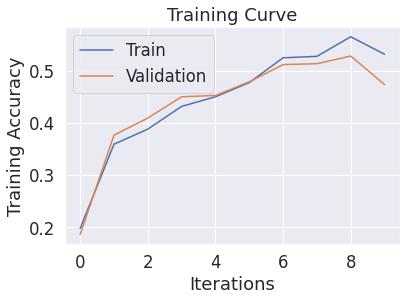

Final Training Accuracy: 0.5314309822421662
Final Validation Accuracy: 0.47340124504810416


In [ ]:
use_cuda = True
model6class = CNNwithout()

if use_cuda and torch.cuda.is_available():
  model6class.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(model6class, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.01, num_epochs=10)

Epoch 0
Epoch:  0  Train Accuracy:  0.6071414873624056
Epoch:  0  Validation Accuracy:  0.519807583474816
Epoch 1
Epoch:  1  Train Accuracy:  0.6326467993709968
Epoch:  1  Validation Accuracy:  0.5382003395585738
Epoch 2
Epoch:  2  Train Accuracy:  0.6201050895562459
Epoch:  2  Validation Accuracy:  0.512450481041313
Epoch 3
Epoch:  3  Train Accuracy:  0.6512484179035785
Epoch:  3  Validation Accuracy:  0.533106960950764
Epoch 4
Epoch:  4  Train Accuracy:  0.6622559736125494
Epoch:  4  Validation Accuracy:  0.5263157894736842
Epoch 5
Epoch:  5  Train Accuracy:  0.6749127449852338
Epoch:  5  Validation Accuracy:  0.5254668930390493
Epoch 6
Epoch:  6  Train Accuracy:  0.700878303225559
Epoch:  6  Validation Accuracy:  0.5325410299943407
Epoch 7
Epoch:  7  Train Accuracy:  0.7194799217581406
Epoch:  7  Validation Accuracy:  0.5514997170345218
Epoch 8
Epoch:  8  Train Accuracy:  0.7301039389406666
Epoch:  8  Validation Accuracy:  0.5237691001697793
Epoch 9
Epoch:  9  Train Accuracy:  0.751

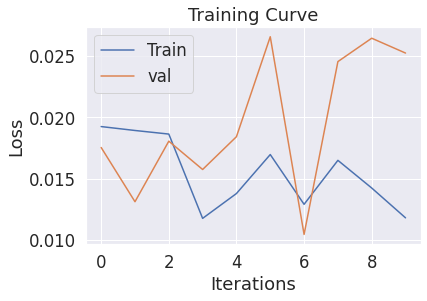

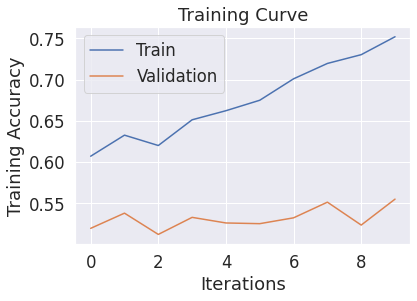

Final Training Accuracy: 0.7518122195374526
Final Validation Accuracy: 0.5551782682512734


In [ ]:
train2(model6class, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.005, num_epochs=10)

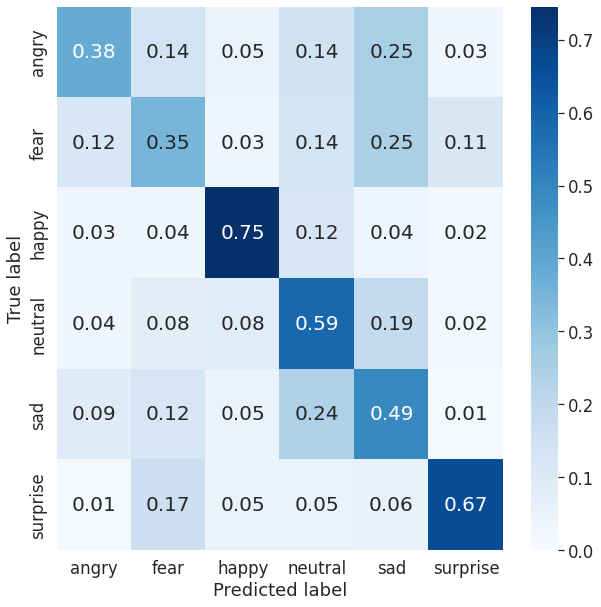

In [ ]:
val_loader = torch.utils.data.DataLoader(vData, batch_size=64, 
                                          num_workers=1, shuffle=True)
matrix(model6class)

Epoch 0
Epoch:  0  Train Accuracy:  0.8220764775821732
Epoch:  0  Validation Accuracy:  0.5628183361629882
Epoch 1
Epoch:  1  Train Accuracy:  0.8407548038200438
Epoch:  1  Validation Accuracy:  0.5633842671194115
Epoch 2
Epoch:  2  Train Accuracy:  0.8500747900126567
Epoch:  2  Validation Accuracy:  0.5582908885116016
Epoch 3
Epoch:  3  Train Accuracy:  0.8665285927971464
Epoch:  3  Validation Accuracy:  0.55800792303339
Epoch 4
Epoch:  4  Train Accuracy:  0.8807195182756108
Epoch:  4  Validation Accuracy:  0.5647990945104697
Epoch 5
Epoch:  5  Train Accuracy:  0.8868561346987305
Epoch:  5  Validation Accuracy:  0.5758347481607244
Epoch 6
Epoch:  6  Train Accuracy:  0.8925325048901163
Epoch:  6  Validation Accuracy:  0.5701754385964912
Epoch 7
Epoch:  7  Train Accuracy:  0.896904844091589
Epoch:  7  Validation Accuracy:  0.5679117147707979
Epoch 8
Epoch:  8  Train Accuracy:  0.905227630115445
Epoch:  8  Validation Accuracy:  0.5667798528579513
Epoch 9
Epoch:  9  Train Accuracy:  0.909

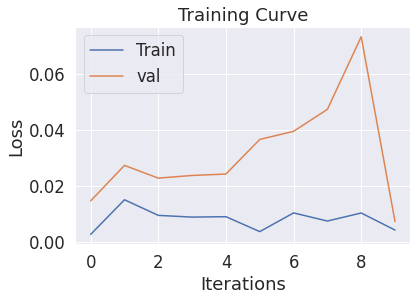

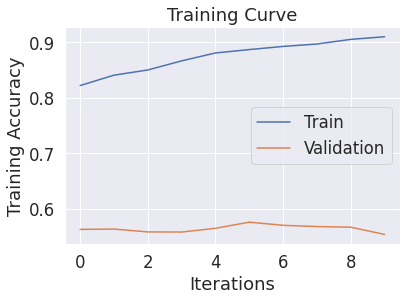

Final Training Accuracy: 0.9099835078433629
Final Validation Accuracy: 0.553763440860215


In [ ]:
train2(model6class, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.001, num_epochs=10, wd=0.001)

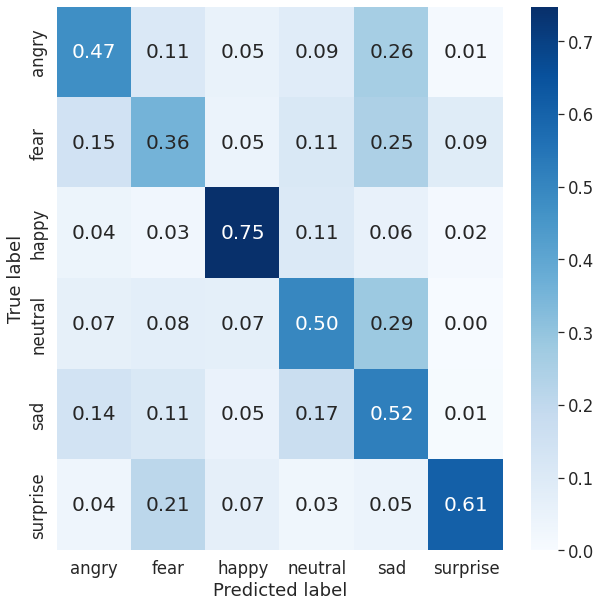

In [ ]:
matrix(model6class)

Epoch 0
Epoch:  0  Train Accuracy:  0.9117094312123653
Epoch:  0  Validation Accuracy:  0.5628183361629882
Epoch 1
Epoch:  1  Train Accuracy:  0.9239059563533157
Epoch:  1  Validation Accuracy:  0.5625353706847764
Epoch 2
Epoch:  2  Train Accuracy:  0.9291220803129674
Epoch:  2  Validation Accuracy:  0.5614035087719298
Epoch 3
Epoch:  3  Train Accuracy:  0.9338396041882407
Epoch:  3  Validation Accuracy:  0.5614035087719298
Epoch 4
Epoch:  4  Train Accuracy:  0.9298508035132129
Epoch:  4  Validation Accuracy:  0.5577249575551783


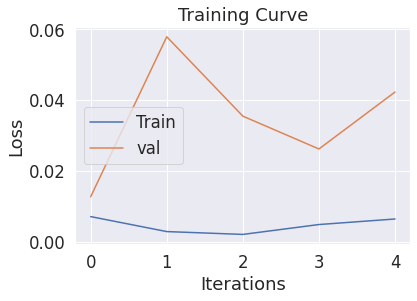

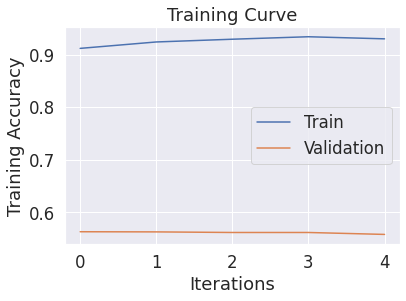

Final Training Accuracy: 0.9298508035132129
Final Validation Accuracy: 0.5577249575551783


In [ ]:
train2(model6class, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.001, num_epochs=5, wd=0.005)

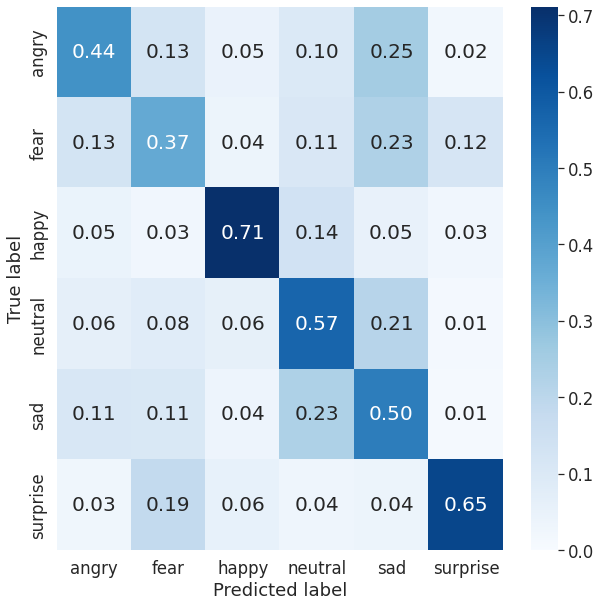

In [ ]:
matrix(model6class)

In [ ]:
#Convolutional Neural Network Architecture
class CNNwithout2(nn.Module):
    def __init__(self):
        super(CNNwithout2, self).__init__()

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 

        self.conv1 = nn.Conv2d(256, 300, 3, padding = 3) #in_channels, out_chanels, kernel_size 
        self.conv2 = nn.Conv2d(300, 350, 3,padding = 3) #in_channels, out_chanels, kernel_size
        self.conv3 = nn.Conv2d(350, 400, 1,padding = 1)
        self.conv4 = nn.Conv2d(400, 450, 1, padding = 1)
        
        self.fc1 = nn.Linear(450*2*2, 70) #chanels*dimension
        self.fc3 = nn.Linear(70, 32)
        self.fc2 = nn.Linear(32, 6) #last output channel always = 6
        self.dropout = nn.Dropout(0.4)
        self.bn = nn.BatchNorm2d(300)
        self.bn2 = nn.BatchNorm2d(400)

    def forward(self, x):
        x = self.pool(F.relu(self.bn(self.conv1(x)))) #5
        # 113
        x = self.pool(F.relu(self.dropout(self.conv2(x)))) #4
        # 55
        x = self.pool(F.relu(self.bn2(self.conv3(x)))) #3
        # 26
        x = self.pool(F.relu(self.dropout(self.conv4(x)))) #2
        # 12


        x = x.view(-1, 450*2*2)
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc3(x)))
        x = self.fc2(x)
        # x = x.squeeze(1)
        return x

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.1938787251179381
Epoch:  0  Validation Accuracy:  0.2436332767402377
Epoch 1
Epoch:  1  Train Accuracy:  0.23204080849921374
Epoch:  1  Validation Accuracy:  0.2560837577815506
Epoch 2
Epoch:  2  Train Accuracy:  0.37065163195643
Epoch:  2  Validation Accuracy:  0.38653084323712505
Epoch 3
Epoch:  3  Train Accuracy:  0.38633835768802977
Epoch:  3  Validation Accuracy:  0.3904923599320883
Epoch 4
Epoch:  4  Train Accuracy:  0.41748168603536223
Epoch:  4  Validation Accuracy:  0.42869269949066213
Epoch 5
Epoch:  5  Train Accuracy:  0.4183254707935412
Epoch:  5  Validation Accuracy:  0.4207696661007357
Epoch 6
Epoch:  6  Train Accuracy:  0.4640816169984275
Epoch:  6  Validation Accuracy:  0.4680249009620826
Epoch 7
Epoch:  7  Train Accuracy:  0.49626049936716143
Epoch:  7  Validation Accuracy:  0.4731182795698925
Epoch 8
Epoch:  8  Train Accuracy:  0.5166647489740345
Epoch:  8  Validation Accuracy:  0.5014148273

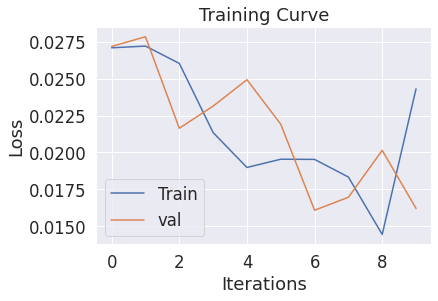

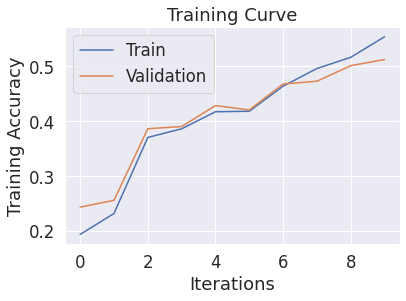

Final Training Accuracy: 0.5541748168603536
Final Validation Accuracy: 0.5127334465195246


In [ ]:
use_cuda = True
model6class2 = CNNwithout()

if use_cuda and torch.cuda.is_available():
  model6class2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(model6class2, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.005, num_epochs=10)

Epoch 0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch:  0  Train Accuracy:  0.5885782226824684
Epoch:  0  Validation Accuracy:  0.530560271646859
Epoch 1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  1  Train Accuracy:  0.6023856096344878
Epoch:  1  Validation Accuracy:  0.534804753820034
Epoch 2


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  2  Train Accuracy:  0.609404364668431
Epoch:  2  Validation Accuracy:  0.5333899264289756
Epoch 3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  3  Train Accuracy:  0.6247842595788747
Epoch:  3  Validation Accuracy:  0.5282965478211659
Epoch 4


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  4  Train Accuracy:  0.6217926590726038
Epoch:  4  Validation Accuracy:  0.5203735144312394
Epoch 5


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  5  Train Accuracy:  0.6430790472903003
Epoch:  5  Validation Accuracy:  0.5183927560837578
Epoch 6


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  6  Train Accuracy:  0.6343343688873547
Epoch:  6  Validation Accuracy:  0.5082059988681381
Epoch 7


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  7  Train Accuracy:  0.6790166072181951
Epoch:  7  Validation Accuracy:  0.5498019241652519
Epoch 8


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  8  Train Accuracy:  0.6754496989222567
Epoch:  8  Validation Accuracy:  0.5141482739105829
Epoch 9


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  9  Train Accuracy:  0.6929007018755033
Epoch:  9  Validation Accuracy:  0.5387662705149971


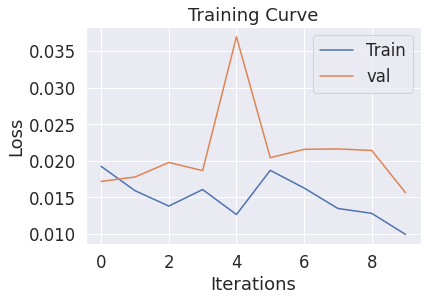

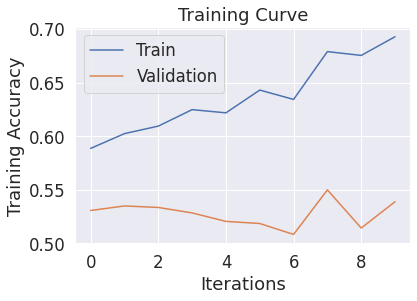

Final Training Accuracy: 0.6929007018755033
Final Validation Accuracy: 0.5387662705149971


In [ ]:
train2(model6class2, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.001, num_epochs=10)

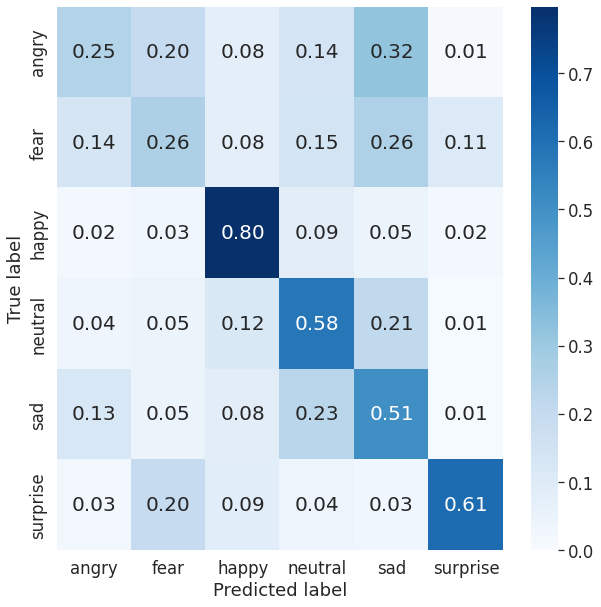

In [ ]:
matrix(model6class2)

Epoch 0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  0  Train Accuracy:  0.7179457676523607
Epoch:  0  Validation Accuracy:  0.5226372382569326
Epoch 1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  1  Train Accuracy:  0.7403827714493921
Epoch:  1  Validation Accuracy:  0.5398981324278438
Epoch 2


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  2  Train Accuracy:  0.7557626663598358
Epoch:  2  Validation Accuracy:  0.5404640633842671
Epoch 3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  3  Train Accuracy:  0.7609787903194876
Epoch:  3  Validation Accuracy:  0.5418788907753254
Epoch 4


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  4  Train Accuracy:  0.7737506232501055
Epoch:  4  Validation Accuracy:  0.533106960950764
Epoch 5


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  5  Train Accuracy:  0.7789283933571127
Epoch:  5  Validation Accuracy:  0.5350877192982456
Epoch 6


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  6  Train Accuracy:  0.7871361178230353
Epoch:  6  Validation Accuracy:  0.5226372382569326
Epoch 7


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  7  Train Accuracy:  0.7688796839642542
Epoch:  7  Validation Accuracy:  0.5288624787775892
Epoch 8


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  8  Train Accuracy:  0.7673071760058298
Epoch:  8  Validation Accuracy:  0.5359366157328805
Epoch 9


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  9  Train Accuracy:  0.8147892455797184
Epoch:  9  Validation Accuracy:  0.5271646859083192


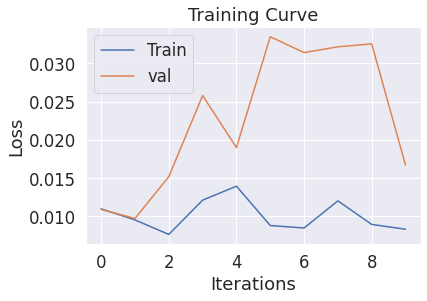

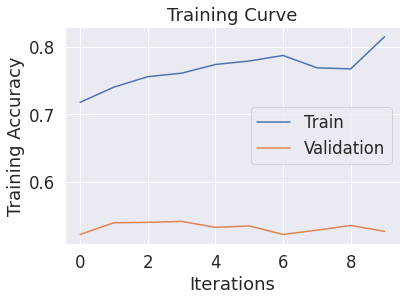

Final Training Accuracy: 0.8147892455797184
Final Validation Accuracy: 0.5271646859083192


In [ ]:
train2(model6class2, tData, vData, batch_size = 64, momentum = 0.9, lr= 0.0005, num_epochs=10, wd=0.001)

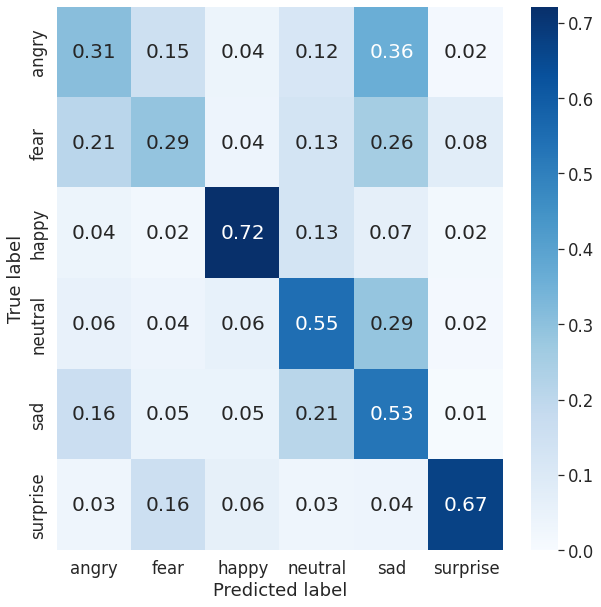

In [ ]:
matrix(model6class2)

# batch2N

In [ ]:
def trainbatch2d(model, train_data, val_data, batch_size=3000, num_epochs=5, lr = 0.01):
    
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9,weight_decay=5e-4)

    iters, losses, train_acc, val_acc, val_loss = [], [], [], [],[]

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch", epoch)
        n = 0
        for imgs, labels in iter(train_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1

        for imgs, labels in iter(val_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss_val = criterion(out, labels) # compute the total loss
        
        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        val_loss.append(float(loss_val)/batch_size)
        # calculate accuracy at each epoch instead of iteration
        # def get_accuracy(model, data):
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        # compute validation acc every epoch
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print("Epoch: ", epoch, " Train Accuracy: ", train_acc[epoch])
        print("Epoch: ", epoch, " Validation Accuracy: ", val_acc[epoch])

            

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.plot(iters, val_loss, label="val")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:


train_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013_final/train'
val_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013_final/val'
test_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013_final/test'

train_data = datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
val_data = datasets.DatasetFolder(val_path, loader=torch.load, extensions=('.tensor'))
test_data = datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))



KeyboardInterrupt: ignored

In [21]:


# Modified from Tutorial 3a and lecture notes
class CNNalex(nn.Module):
    def __init__(self):
        super(CNNalex, self).__init__()
        # nn.Conv2d(256,300,5,2)
        self.conv1 = nn.Conv2d(256,300,3, padding = 2)                      # Modified to 3, in_channels, out_chanels, kernel_size
        self.bn1 = nn.BatchNorm2d(300)
        self.conv2 = nn.Conv2d(300,350,3)
        self.bn2 = nn.BatchNorm2d(350)

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.fc1 = nn.Linear(350*2*2, 32) 
        self.fc2 = nn.Linear(32, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))                      #4
        x = F.relu(self.bn2(self.conv2(x)))#2
        x = x.view(-1, 350*2*2)                                             # Modified size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.5195412879223718
Epoch:  0  Validation Accuracy:  0.5226372382569326
Epoch 1
Epoch:  1  Train Accuracy:  0.6231350439151613
Epoch:  1  Validation Accuracy:  0.5608375778155065
Epoch 2
Epoch:  2  Train Accuracy:  0.7010700724887815
Epoch:  2  Validation Accuracy:  0.5744199207696661
Epoch 3
Epoch:  3  Train Accuracy:  0.77225482299697
Epoch:  3  Validation Accuracy:  0.5880022637238257
Epoch 4
Epoch:  4  Train Accuracy:  0.8522993134660377
Epoch:  4  Validation Accuracy:  0.5823429541595926
Epoch 5
Epoch:  5  Train Accuracy:  0.8760019944003375
Epoch:  5  Validation Accuracy:  0.5382003395585738
Epoch 6
Epoch:  6  Train Accuracy:  0.9115943696544317
Epoch:  6  Validation Accuracy:  0.5483870967741935
Epoch 7
Epoch:  7  Train Accuracy:  0.9620680397345913
Epoch:  7  Validation Accuracy:  0.5571590265987549
Epoch 8
Epoch:  8  Train Accuracy:  0.9736892570858743
Epoch:  8  Validation Accuracy:  0.5673457838143746

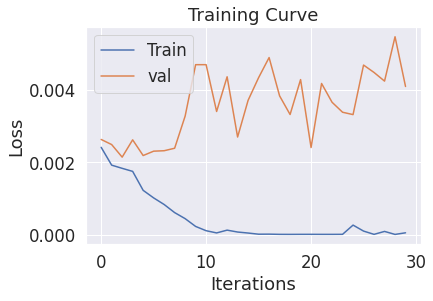

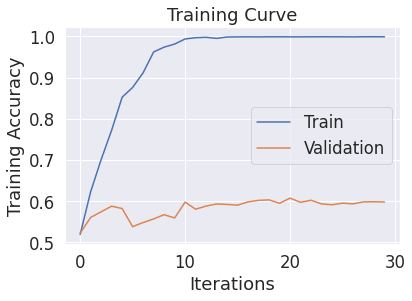

Final Training Accuracy: 0.9988110305680206
Final Validation Accuracy: 0.5981890209394454


In [ ]:
use_cuda = True
model1 = CNNalex()

if use_cuda and torch.cuda.is_available():
  model1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainbatch2d(model1, tData, vData, batch_size = 500, lr= 0.01, num_epochs=30)

torch.save(model1.state_dict(), '/content/drive/MyDrive/APS360 Team/model checkpoint/check_point_resampling_Alexnet1.pth')

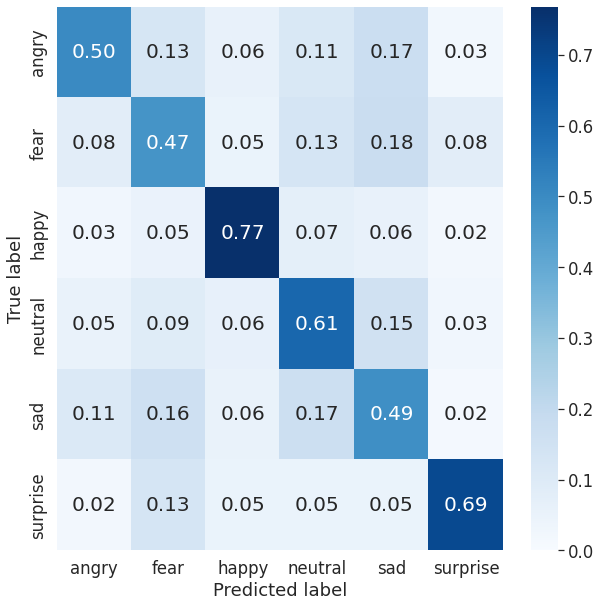

In [ ]:
matrix(model1)

Epoch 0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  0  Train Accuracy:  0.9989644459785986
Epoch:  0  Validation Accuracy:  0.597623089983022
Epoch 1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  1  Train Accuracy:  0.9990411536838876
Epoch:  1  Validation Accuracy:  0.6024335031126202
Epoch 2


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  2  Train Accuracy:  0.9990027998312431
Epoch:  2  Validation Accuracy:  0.6049801924165252
Epoch 3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  3  Train Accuracy:  0.9990027998312431
Epoch:  3  Validation Accuracy:  0.6021505376344086
Epoch 4


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  4  Train Accuracy:  0.9989644459785986
Epoch:  4  Validation Accuracy:  0.5973401245048104
Epoch 5


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  5  Train Accuracy:  0.9990411536838876
Epoch:  5  Validation Accuracy:  0.6018675721561969
Epoch 6


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  6  Train Accuracy:  0.9990411536838876
Epoch:  6  Validation Accuracy:  0.6018675721561969
Epoch 7


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  7  Train Accuracy:  0.9990795075365321
Epoch:  7  Validation Accuracy:  0.5984719864176571
Epoch 8


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  8  Train Accuracy:  0.9990027998312431
Epoch:  8  Validation Accuracy:  0.6024335031126202
Epoch 9


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  9  Train Accuracy:  0.9990795075365321
Epoch:  9  Validation Accuracy:  0.5981890209394454


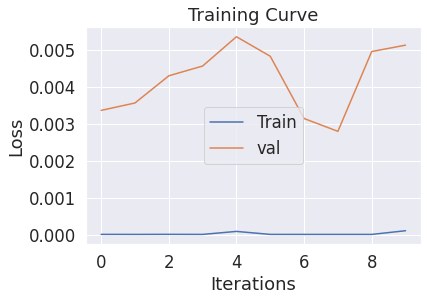

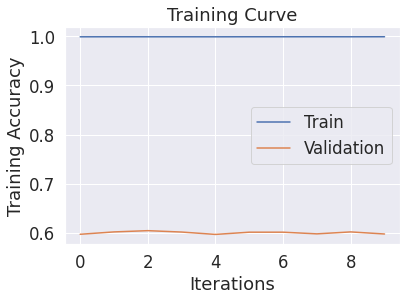

Final Training Accuracy: 0.9990795075365321
Final Validation Accuracy: 0.5981890209394454


In [ ]:
trainbatch2d(model1, tData, vData, batch_size = 500, lr= 0.005, num_epochs=10)
torch.save(model1.state_dict(), '/content/drive/MyDrive/APS360 Team/model checkpoint/check_point_resampling_Alexnet2.pth')

Epoch 0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  0  Train Accuracy:  0.9990027998312431
Epoch:  0  Validation Accuracy:  0.6007357102433503
Epoch 1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  1  Train Accuracy:  0.9990795075365321
Epoch:  1  Validation Accuracy:  0.597623089983022
Epoch 2


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  2  Train Accuracy:  0.9989644459785986
Epoch:  2  Validation Accuracy:  0.5962082625919638
Epoch 3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  3  Train Accuracy:  0.9990027998312431
Epoch:  3  Validation Accuracy:  0.601018675721562
Epoch 4


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  4  Train Accuracy:  0.9990027998312431
Epoch:  4  Validation Accuracy:  0.5956423316355405
Epoch 5


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  5  Train Accuracy:  0.9990411536838876
Epoch:  5  Validation Accuracy:  0.6035653650254669
Epoch 6


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  6  Train Accuracy:  0.9990795075365321
Epoch:  6  Validation Accuracy:  0.5990379173740804
Epoch 7


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  7  Train Accuracy:  0.9990411536838876
Epoch:  7  Validation Accuracy:  0.5990379173740804
Epoch 8


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  8  Train Accuracy:  0.9991562152418211
Epoch:  8  Validation Accuracy:  0.6024335031126202
Epoch 9


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1fbecb95f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch:  9  Train Accuracy:  0.9990027998312431
Epoch:  9  Validation Accuracy:  0.6018675721561969


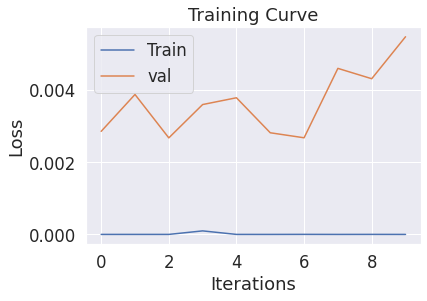

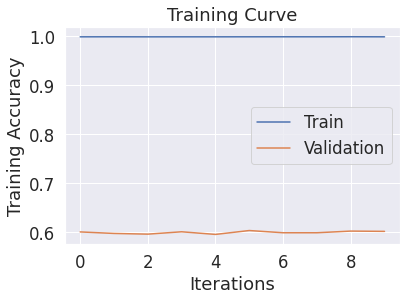

Final Training Accuracy: 0.9990027998312431
Final Validation Accuracy: 0.6018675721561969


In [ ]:
trainbatch2d(model1, tData, vData, batch_size = 500, lr= 0.005, num_epochs=10)
torch.save(model1.state_dict(), '/content/drive/MyDrive/APS360 Team/model checkpoint/check_point_resampling_Alexnet3.pth')

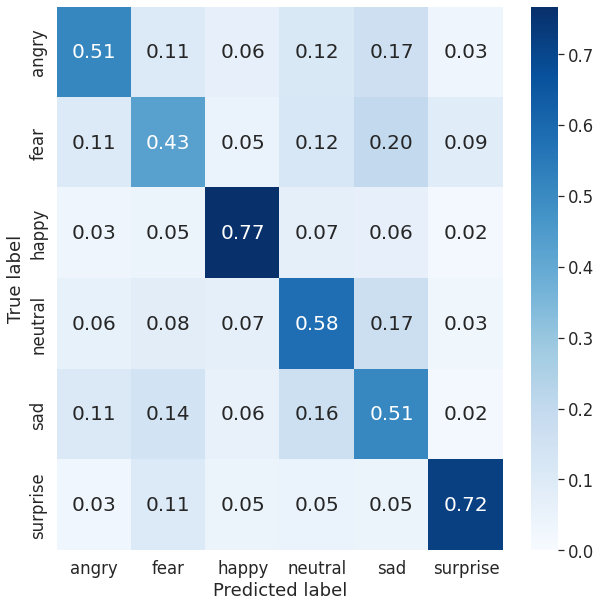

In [ ]:
matrix(model1)

# Lr scheduler

In [ ]:
def trainscheduler(model, train_data, val_data, wd = 5e-4, momentum = 0.9, batch_size=3000, num_epochs=5, lr = 0.01):
    
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum,weight_decay=wd)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode = 'min', factor = 0.96, verbose = True,patience = 2,cooldown = 0, threshold=1e-3)

    iters, losses, train_acc, val_acc, val_loss = [], [], [], [],[]

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch", epoch)
        n = 0
        for imgs, labels in iter(train_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1

        for imgs, labels in iter(val_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss_val = criterion(out, labels) # compute the total loss
        
        # save the current training information
        scheduler.step(loss_val)
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        val_loss.append(float(loss_val)/batch_size)
        # calculate accuracy at each epoch instead of iteration
        # def get_accuracy(model, data):
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        # compute validation acc every epoch
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print("Epoch: ", epoch, " Train Accuracy: ", train_acc[epoch])
        print("Epoch: ", epoch, " Validation Accuracy: ", val_acc[epoch])

            

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.plot(iters, val_loss, label="val")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.5372607678441299
Epoch:  0  Validation Accuracy:  0.5277306168647425
Epoch 1
Epoch:  1  Train Accuracy:  0.6134315191961033
Epoch:  1  Validation Accuracy:  0.5656479909451047
Epoch 2
Epoch:  2  Train Accuracy:  0.6979250565719326
Epoch:  2  Validation Accuracy:  0.5877192982456141
Epoch 3
Epoch:  3  Train Accuracy:  0.783645917232386
Epoch:  3  Validation Accuracy:  0.5814940577249575
Epoch 4
Epoch:  4  Train Accuracy:  0.8197368925708587
Epoch:  4  Validation Accuracy:  0.5744199207696661
Epoch 5
Epoch:  5  Train Accuracy:  0.8585126375944464
Epoch:  5  Validation Accuracy:  0.5656479909451047
Epoch 6
Epoch:  6  Train Accuracy:  0.9079507536532044
Epoch:  6  Validation Accuracy:  0.5514997170345218
Epoch 7
Epoch:  7  Train Accuracy:  0.9629118244927704
Epoch:  7  Validation Accuracy:  0.5698924731182796
Epoch 8
Epoch:  8  Train Accuracy:  0.9831626586890653
Epoch:  8  Validation Accuracy:  0.566779852857951

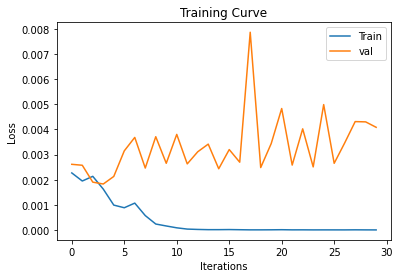

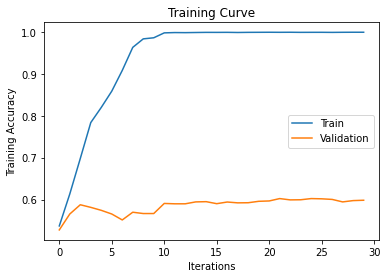

Final Training Accuracy: 0.9989644459785986
Final Validation Accuracy: 0.5984719864176571


In [ ]:
use_cuda = True
modelnew = CNNalex()

if use_cuda and torch.cuda.is_available():
  modelnew.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainscheduler(modelnew, tData, vData, batch_size = 500, lr= 0.01, num_epochs=30)

torch.save(modelnew.state_dict(), '/content/drive/MyDrive/APS360 Team/model checkpoint/Alexwithscheduler1.pth')

In [ ]:
val_loader = torch.utils.data.DataLoader(vData, batch_size=64, 
                                          num_workers=1, shuffle=True)

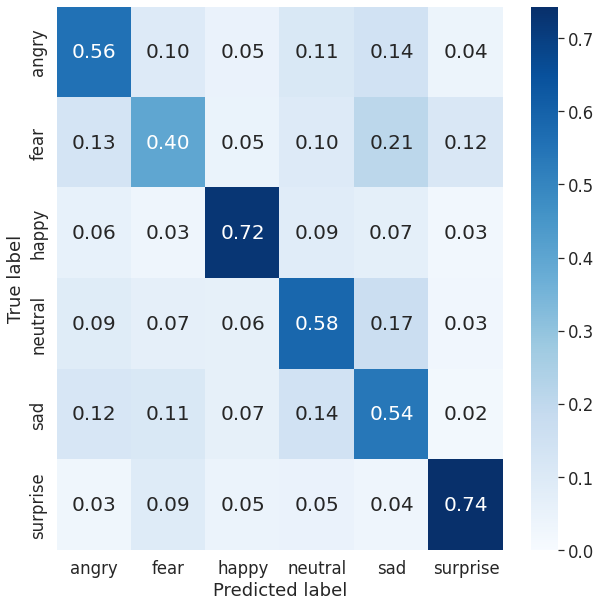

In [ ]:

matrix(modelnew)

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.47551106508648794
Epoch:  0  Validation Accuracy:  0.48047538200339557
Epoch 1
Epoch:  1  Train Accuracy:  0.5588539868829824
Epoch:  1  Validation Accuracy:  0.5401810979060555
Epoch 2
Epoch:  2  Train Accuracy:  0.617957273808154
Epoch:  2  Validation Accuracy:  0.5645161290322581
Epoch 3
Epoch:  3  Train Accuracy:  0.6458021708280597
Epoch:  3  Validation Accuracy:  0.5786644029428409
Epoch 4
Epoch:  4  Train Accuracy:  0.7144172132090668
Epoch:  4  Validation Accuracy:  0.5806451612903226
Epoch 5
Epoch:  5  Train Accuracy:  0.7685344992904537
Epoch:  5  Validation Accuracy:  0.5557441992076967
Epoch 6
Epoch:  6  Train Accuracy:  0.823533923982664
Epoch:  6  Validation Accuracy:  0.5684776457272213
Epoch 7
Epoch:  7  Train Accuracy:  0.8423656656311126
Epoch:  7  Validation Accuracy:  0.5444255800792304
Epoch 8
Epoch:  8  Train Accuracy:  0.8368427108503049
Epoch:  8  Validation Accuracy:  0.51754385964912

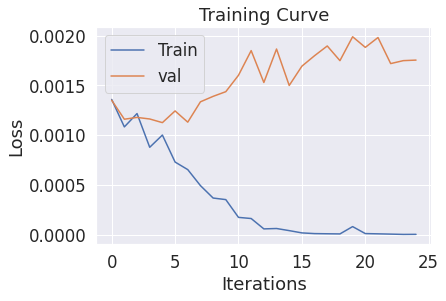

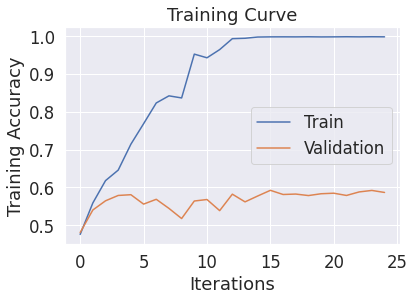

Final Training Accuracy: 0.9986192613047981
Final Validation Accuracy: 0.5865874363327674


In [ ]:
use_cuda = True
modelnew2 = CNNalex()

if use_cuda and torch.cuda.is_available():
  modelnew2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainscheduler(modelnew2, tData, vData, batch_size = 1000, lr= 0.01, num_epochs=25)

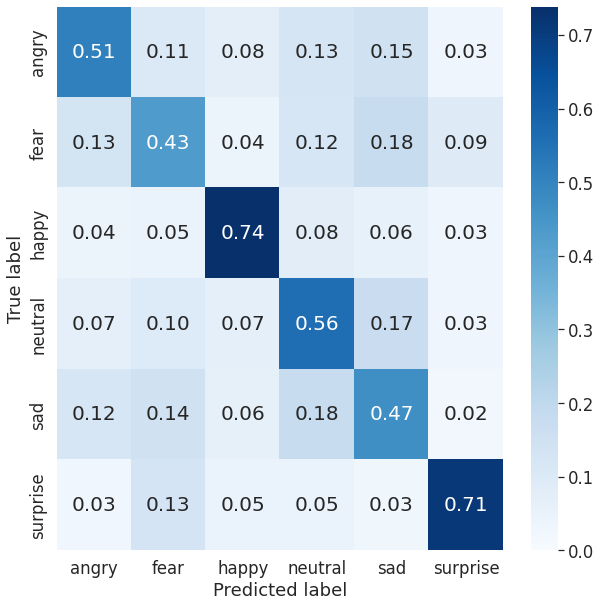

In [ ]:
matrix(modelnew2)

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.48835960572239484
Epoch:  0  Validation Accuracy:  0.4898132427843803
Epoch 1
Epoch:  1  Train Accuracy:  0.5629194952632992
Epoch:  1  Validation Accuracy:  0.5407470288624788
Epoch 2
Epoch:  2  Train Accuracy:  0.6273923215587006
Epoch:  2  Validation Accuracy:  0.5560271646859083
Epoch 3
Epoch:  3  Train Accuracy:  0.6514785410194454
Epoch:  3  Validation Accuracy:  0.5370684776457272
Epoch 4
Epoch:  4  Train Accuracy:  0.7024508111839834
Epoch:  4  Validation Accuracy:  0.5557441992076967
Epoch 5
Epoch     6: reducing learning rate of group 0 to 9.6000e-03.
Epoch:  5  Train Accuracy:  0.7668852836267404
Epoch:  5  Validation Accuracy:  0.5622524052065648
Epoch 6
Epoch:  6  Train Accuracy:  0.8122962451578261
Epoch:  6  Validation Accuracy:  0.5393322014714205
Epoch 7
Epoch:  7  Train Accuracy:  0.8613124688374947
Epoch:  7  Validation Accuracy:  0.5464063384267119
Epoch 8
Epoch     9: reducing learning ra

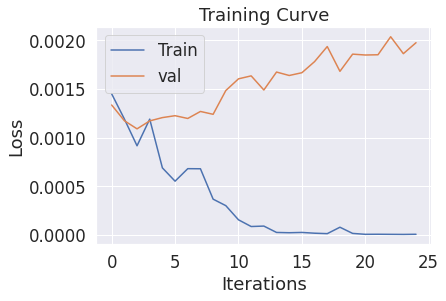

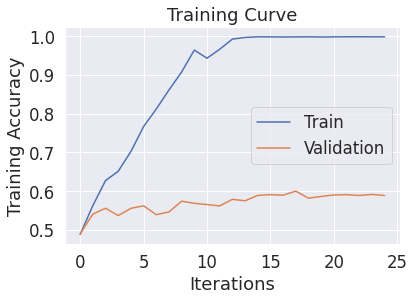

Final Training Accuracy: 0.9988493844206651
Final Validation Accuracy: 0.5888511601584606


In [ ]:
use_cuda = True
modelnew3 = CNNalex()

if use_cuda and torch.cuda.is_available():
  modelnew3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainscheduler(modelnew3, tData, vData, batch_size = 1000, lr= 0.01, num_epochs=25)

# AlexNet Test

In [10]:
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [11]:
def save_feature(data, path):
  
  # classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
  classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


  dataloader = torch.utils.data.DataLoader(data, batch_size=1) #save one at a time
  i = 0
  for imgs, labels in (dataloader):
    features = alexnet.features(imgs)
    #convert to tensor
    x = torch.from_numpy(features.detach().numpy()) 
    # save into drive
    fullPath = path + '/' + classes[labels]

    # create folder
    if not os.path.isdir(fullPath):
      os.mkdir(fullPath)
    # give name and squeeze https://piazza.com/class/ky528kuhk7b27q?cid=285
    torch.save(x.squeeze(0), fullPath+'/' + str(i) + '.tensor')
    i = i+1

In [12]:
testPath = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER_alexnet_big/test'


parent_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER-2013/'

data_transform = transforms.Compose(
    [
        transforms.Resize((224,224)), 
        #convert image to grayscale
        # transforms.Grayscale(num_output_channels=3),
        #randomly adding brightness 
        # transforms.ColorJitter(brightness=(1,1.2)),
        #apply ramdom rotation from -30 to 30 degrees
        # transforms.RandomRotation(30),
        #apply random horizontal flip with probability of 50% 
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        #normalize the data with 0.5 mean and variance.
        transforms.Normalize((0.5073955,), (0.25,), inplace=True)
       
    ])
test_set = torchvision.datasets.ImageFolder(parent_path+'test',data_transform)

In [13]:
save_feature(test_set, testPath)

In [25]:
modeltestacc = CNNalex()
modeltestacc.load_state_dict(torch.load('/content/drive/MyDrive/APS360 Team/model checkpoint/check_point_resampling_Alexnet3.pth', map_location=torch.device('cpu')))

# modeltestacc.load_state_dict(torch.load('/content/drive/MyDrive/APS360 Team/model checkpoint/check_point_resampling_Alexnet3.pth'))


use_cuda = True

if use_cuda and torch.cuda.is_available():
  modeltestacc.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


In [28]:
testPath = '/content/drive/MyDrive/APS360 Team/aps360_dataset/FER_alexnet_big/test'
testData = torchvision.datasets.DatasetFolder(testPath, loader=torch.load, extensions = ('.tensor'))

test_loader = torch.utils.data.DataLoader(testData, batch_size=50, 
                                          num_workers=1, shuffle=True)
print("Test Accuracy: ", get_accuracy(modeltestacc, test_loader))

Test Accuracy:  0.5853382394565525


In [29]:
print(modeltestacc)

CNNalex(
  (conv1): Conv2d(256, 300, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(300, 350, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1400, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=6, bias=True)
)
